In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

pd.set_option('display.max_columns', None)
sns.set_palette("Pastel1")

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics

In [2]:
#import data table
data=pd.read_csv('HCV-Egy-Data.csv')

In [3]:
#check if all the values are imported correctly. data set has 1385 rows
len(data)

1385

In [4]:
#check types of attributes
#'gender' column: int type for 1=Male 2=Female
#from 'fever' column to 'epigastric pain' column: int type for 1=absent 2=present

data.dtypes

Age                                   int64
Gender                                int64
BMI                                   int64
Fever                                 int64
Nausea/Vomting                        int64
Headache                              int64
Diarrhea                              int64
Fatigue & generalized bone ache       int64
Jaundice                              int64
Epigastric pain                       int64
WBC                                   int64
RBC                                 float64
HGB                                   int64
Plat                                float64
AST 1                                 int64
ALT 1                                 int64
ALT4                                float64
ALT 12                                int64
ALT 24                                int64
ALT 36                                int64
ALT 48                                int64
ALT after 24 w                        int64
RNA Base                        

In [5]:
#value types are as expected
#up to what the data set is projected now, no missing values are detected (yet)
#however, the orginial table of data set (.csv file) displays 'RBC', 'Plat', 'ALT4' as integer values (no floating point)
#so checking again to make sure these 3 columns contain all float values

In [6]:
data['RBC'].apply(type)

0       <class 'float'>
1       <class 'float'>
2       <class 'float'>
3       <class 'float'>
4       <class 'float'>
             ...       
1380    <class 'float'>
1381    <class 'float'>
1382    <class 'float'>
1383    <class 'float'>
1384    <class 'float'>
Name: RBC, Length: 1385, dtype: object

In [7]:
data['Plat'].apply(type)

0       <class 'float'>
1       <class 'float'>
2       <class 'float'>
3       <class 'float'>
4       <class 'float'>
             ...       
1380    <class 'float'>
1381    <class 'float'>
1382    <class 'float'>
1383    <class 'float'>
1384    <class 'float'>
Name: Plat, Length: 1385, dtype: object

In [8]:
data['ALT4'].apply(type)

0       <class 'float'>
1       <class 'float'>
2       <class 'float'>
3       <class 'float'>
4       <class 'float'>
             ...       
1380    <class 'float'>
1381    <class 'float'>
1382    <class 'float'>
1383    <class 'float'>
1384    <class 'float'>
Name: ALT4, Length: 1385, dtype: object

In [9]:
data.head()

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,WBC,RBC,HGB,Plat,AST 1,ALT 1,ALT4,ALT 12,ALT 24,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Baselinehistological staging
0,56,1,35,2,1,1,1,2,2,2,7425,4248807.0,14,112132.0,99,84,52.0,109,81,5,5,5,655330,634536,288194,5,5,13,2
1,46,1,29,1,2,2,1,2,2,1,12101,4429425.0,10,129367.0,91,123,95.0,75,113,57,123,44,40620,538635,637056,336804,31085,4,2
2,57,1,33,2,2,2,2,1,1,1,4178,4621191.0,12,151522.0,113,49,95.0,107,116,5,5,5,571148,661346,5,735945,558829,4,4
3,49,2,33,1,2,1,2,1,2,1,6490,4794631.0,10,146457.0,43,64,109.0,80,88,48,77,33,1041941,449939,585688,744463,582301,10,3
4,59,1,32,1,1,2,1,2,2,2,3661,4606375.0,11,187684.0,99,104,67.0,48,120,94,90,30,660410,738756,3731527,338946,242861,11,1


In [10]:
#Rename attributes
data.columns=['Age','Gender','BMI','Fever','Nausea/ Vomting','Headache','Diarrhea','Fatigue','Jaundice','Epigastric Pain',
              'WBC','RBC','HGB','Plat','AST 1','ALT 1','ALT 4','ALT 12','ALT 24','ALT 36','ALT 48','ALT after 24w',
              'RNA Base','RNA 4','RNA 12','RNA EOT','RNA EF',
              'Baseline Histological Grading','Baseline Histological Staging']

In [11]:
#making a copy of the data set - preparing to make changes to the data set
#to make it suitable for the group's classfication problem
dataC=data.copy()

In [12]:
#Change the data type to correct form - in this case integer -> category type for
#'gender': category type Male = 1 & Female = 2
dataC['Gender'] = dataC['Gender'].apply({1:'Male', 2:'Female'}.get)

#from 'fever' column to 'epigastric pain' column: Absent = 1 & Present = 2
for col in (dataC.iloc[:,3:10]):
    dataC[col] = dataC[col].apply({1:'Absent', 2:'Present'}.get)
    
# setting the stages
dataC['Baseline Histological Staging'] = dataC['Baseline Histological Staging'].apply({
    0:'No Fibrosis',
    1:'Portal Fibrosis',
    2:'Few Septa',
    3:'Many Septa',
    4:'Cirrhosis'
}.get)

In [13]:
#Set Gender and Staging values to category
dataC['Gender'] = dataC['Gender'].astype('category')
for col in (dataC.iloc[:,3:10]):
    dataC[col] = dataC[col].astype('category')

dataC['Baseline Histological Staging'] = dataC['Baseline Histological Staging'].astype('category')
for col in (dataC.iloc[:,3:10]):
    dataC[col] = dataC[col].astype('category')

In [14]:
dataC.head()

,Age,Gender,BMI,Fever,Nausea/ Vomting,Headache,Diarrhea,Fatigue,Jaundice,Epigastric Pain,WBC,RBC,HGB,Plat,AST 1,ALT 1,ALT 4,ALT 12,ALT 24,ALT 36,ALT 48,ALT after 24w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline Histological Grading,Baseline Histological Staging
0,56,Male,35,Present,Absent,Absent,Absent,Present,Present,Present,7425,4248807.0,14,112132.0,99,84,52.0,109,81,5,5,5,655330,634536,288194,5,5,13,Few Septa
1,46,Male,29,Absent,Present,Present,Absent,Present,Present,Absent,12101,4429425.0,10,129367.0,91,123,95.0,75,113,57,123,44,40620,538635,637056,336804,31085,4,Few Septa
2,57,Male,33,Present,Present,Present,Present,Absent,Absent,Absent,4178,4621191.0,12,151522.0,113,49,95.0,107,116,5,5,5,571148,661346,5,735945,558829,4,Cirrhosis
3,49,Female,33,Absent,Present,Absent,Present,Absent,Present,Absent,6490,4794631.0,10,146457.0,43,64,109.0,80,88,48,77,33,1041941,449939,585688,744463,582301,10,Many Septa
4,59,Male,32,Absent,Absent,Present,Absent,Present,Present,Present,3661,4606375.0,11,187684.0,99,104,67.0,48,120,94,90,30,660410,738756,3731527,338946,242861,11,Portal Fibrosis


In [15]:
# Mean, Standard Deviation, IQR, and Min-Max values of the dataset
dataC.describe()

,Age,BMI,WBC,RBC,HGB,Plat,AST 1,ALT 1,ALT 4,ALT 12,ALT 24,ALT 36,ALT 48,ALT after 24w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline Histological Grading
count,1385.000000,1385.000000,1385.000000,1.385000e+03,1385.000000,1385.00000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1.385000e+03,1.385000e+03,1.385000e+03,1385.000000,1385.000000,1385.000000
mean,46.319134,28.608664,7533.386282,4.422130e+06,12.587726,158348.06065,82.774729,83.916245,83.405776,83.510469,83.709025,83.117690,83.629603,33.438267,5.909512e+05,6.008956e+05,2.887536e+05,287660.336462,291378.290975,9.761733
std,8.781506,4.076215,2668.220333,3.463577e+05,1.713511,38794.78555,25.993242,25.922800,26.529730,26.064478,26.205994,26.399031,26.223955,7.073569,3.539354e+05,3.623151e+05,2.853507e+05,264559.525070,267700.691713,4.023896
min,32.000000,22.000000,2991.000000,3.816422e+06,10.000000,93013.00000,39.000000,39.000000,39.000000,39.000000,39.000000,5.000000,5.000000,5.000000,1.100000e+01,5.000000e+00,5.000000e+00,5.000000,5.000000,3.000000
25%,39.000000,25.000000,5219.000000,4.121374e+06,11.000000,124479.00000,60.000000,62.000000,61.000000,60.000000,61.000000,61.000000,61.000000,28.000000,2.692530e+05,2.708930e+05,5.000000e+00,5.000000,5.000000,6.000000
50%,46.000000,29.000000,7498.000000,4.438465e+06,13.000000,157916.00000,83.000000,83.000000,82.000000,84.000000,83.000000,84.000000,83.000000,34.000000,5.931030e+05,5.978690e+05,2.343590e+05,251376.000000,244049.000000,10.000000
75%,54.000000,32.000000,9902.000000,4.721279e+06,14.000000,190314.00000,105.000000,106.000000,107.000000,106.000000,107.000000,106.000000,106.000000,40.000000,8.867910e+05,9.090930e+05,5.248190e+05,517806.000000,527864.000000,13.000000
max,61.000000,35.000000,12101.000000,5.018451e+06,15.000000,226464.00000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,45.000000,1.201086e+06,1.201715e+06,3.731527e+06,808450.000000,810333.000000,16.000000


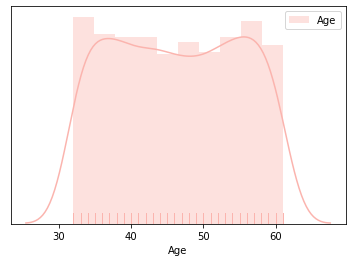

In [16]:
#Age Distribution of all the patients
sns.distplot(dataC.Age,bins=10,label="Age",rug=True)
plt.yticks([])
plt.legend()
plt.show()

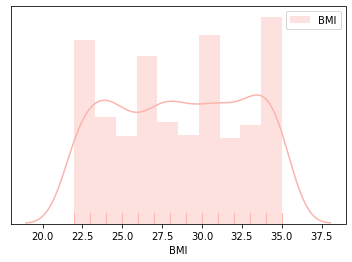

In [17]:
#BMI Distribution of all the patients-show no pattern
sns.distplot(dataC.BMI,bins=10,label="BMI",rug=True)
plt.yticks([])
plt.legend()
plt.show()

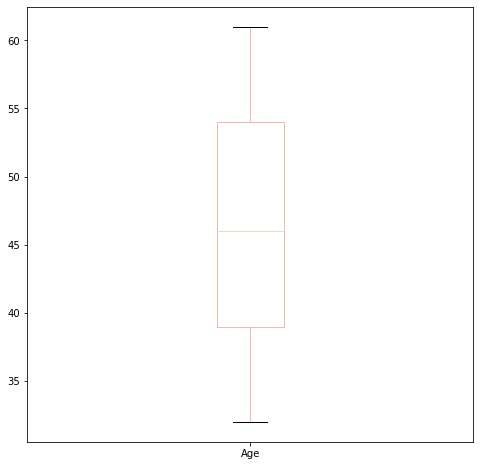

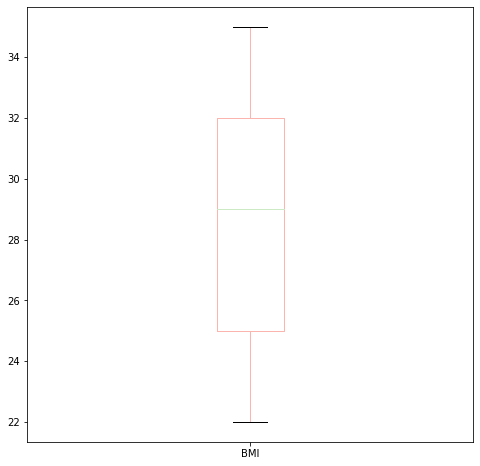

In [18]:
#Boxplot for numeric values in the data set of both genders (Age, BMI)
dataC['Age'].plot(kind='box', subplots=True, sharex=False, sharey=False, figsize=(8,8))
plt.show()
dataC['BMI'].plot(kind='box', subplots=True, sharex=False, sharey=False, figsize=(8,8))
plt.show()

In [19]:
#From the Age boxplot, ages of both genders fall around 30-70 years old
#Set up the ageRange column to draw bar plot
#showing the age range grouped by gender of the data set
bins=[30,40,50,60,70]
labels=['30-39','40-49','50-59','60-69']
dataC["ageRange"]=pd.cut(dataC.Age,bins,labels=labels,include_lowest=True)

In [20]:
#From the BMI boxplot, BMI of both genders fall around 20-40 kg/m2
#BMI values:
#18.5-24.9: Healthy | 25-29.9: Overweight | 30+: Obese
bins=[20,25,30,35]
labels=['Healthy','Overweight','Obese']
dataC["bmiRange"]=pd.cut(dataC.BMI,bins,labels=labels,include_lowest=True)

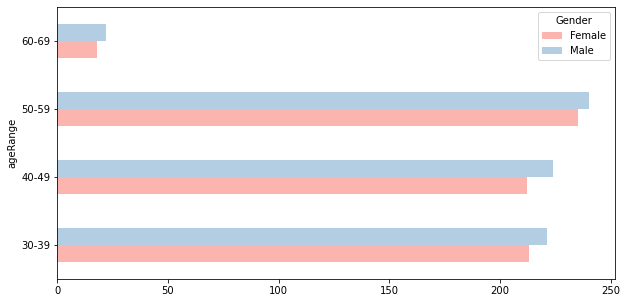

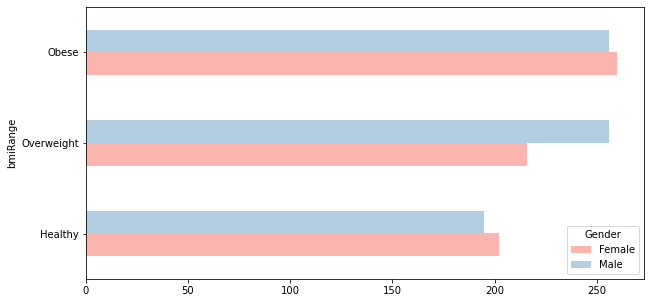

In [21]:
# Plotting bar graphs

# Group age range based on gender
dataC.groupby(['ageRange','Gender']).size().unstack().plot(kind='barh', figsize=(10,5))

# Group bmi range based on gender range
dataC.groupby(['bmiRange','Gender']).size().unstack().plot(kind='barh', figsize=(10,5))

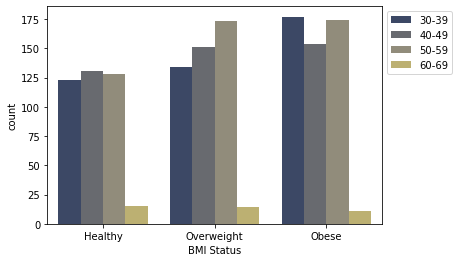

In [22]:
# Group bmi range based on age range
dataC.groupby(['bmiRange', 'ageRange'])
# Plotting
sns.countplot(x=dataC['bmiRange'], hue=dataC.ageRange, palette="cividis")
plt.xlabel('BMI Status')
plt.legend(bbox_to_anchor=(1,1))
plt.show()


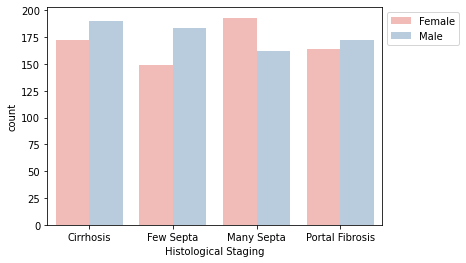

In [23]:
#Baseline Histological Staging across each gender
sns.countplot(x=dataC['Baseline Histological Staging'], hue=dataC.Gender)
plt.xlabel('Histological Staging')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

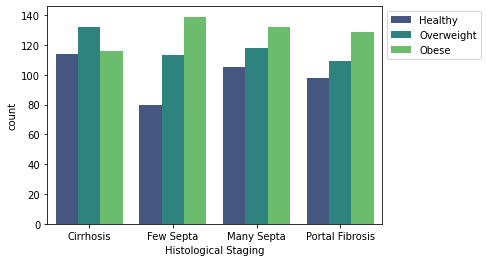

In [24]:
#Baseline Histological Staging based on BMI status
sns.countplot(x=dataC['Baseline Histological Staging'], hue=dataC.bmiRange, palette="viridis")
plt.xlabel('Histological Staging')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

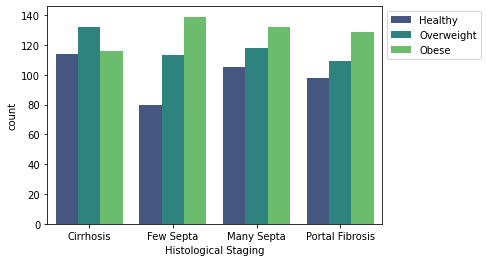

In [25]:
#Baseline Histological Staging based on BMI status
sns.countplot(x=dataC['Baseline Histological Staging'], hue=dataC.bmiRange, palette="viridis")
plt.xlabel('Histological Staging')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

In [26]:
#
# ----------- REPORT 2 ----------- #
#

In [27]:
# Copy of the data set for processing
data2=data.copy()

In [28]:
# setting the stages
data['Baseline Histological Staging'] = data['Baseline Histological Staging'].apply({
    0:'No Fibrosis',
    1:'Portal Fibrosis',
    2:'Few Septa',
    3:'Many Septa',
    4:'Cirrhosis'
}.get)

# Dropping category symptoms columns from Fever -> Epigastric pain
data.drop(data.iloc[:, 3:10], axis = 1, inplace = True)
data.head()

,Age,Gender,BMI,WBC,RBC,HGB,Plat,AST 1,ALT 1,ALT 4,ALT 12,ALT 24,ALT 36,ALT 48,ALT after 24w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline Histological Grading,Baseline Histological Staging
0,56,1,35,7425,4248807.0,14,112132.0,99,84,52.0,109,81,5,5,5,655330,634536,288194,5,5,13,Few Septa
1,46,1,29,12101,4429425.0,10,129367.0,91,123,95.0,75,113,57,123,44,40620,538635,637056,336804,31085,4,Few Septa
2,57,1,33,4178,4621191.0,12,151522.0,113,49,95.0,107,116,5,5,5,571148,661346,5,735945,558829,4,Cirrhosis
3,49,2,33,6490,4794631.0,10,146457.0,43,64,109.0,80,88,48,77,33,1041941,449939,585688,744463,582301,10,Many Septa
4,59,1,32,3661,4606375.0,11,187684.0,99,104,67.0,48,120,94,90,30,660410,738756,3731527,338946,242861,11,Portal Fibrosis


In [29]:
# Classifiers for data set
x = data.iloc[:,:-1].values
y = data['Baseline Histological Staging'].values

# Spliting the data set to 80% for training 20% for testing
training_x, testing_x, training_y, testing_y = train_test_split(x,y, test_size=0.20)

In [30]:
# Scale values to be on the same scale
scaler = StandardScaler()
scaler.fit(training_x)
training_x = scaler.transform(training_x)
testing_x = scaler.transform(testing_x)

# For display testing data set after scaling
tst_x = pd.DataFrame(training_x, columns = data.columns[:-1])
tst_x.head()

,Age,Gender,BMI,WBC,RBC,HGB,Plat,AST 1,ALT 1,ALT 4,ALT 12,ALT 24,ALT 36,ALT 48,ALT after 24w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline Histological Grading
0,0.409124,-1.007246,-0.613576,0.008741,-1.196860,0.837146,-0.964478,0.773217,-0.595173,1.248743,-1.322994,0.971483,-1.223718,-0.461474,-1.359292,-1.592895,-1.572528,0.948254,0.176524,0.170962,-0.706241
1,0.635891,0.992806,-1.600285,-0.813803,0.483758,-0.924040,-0.205166,1.579926,-1.175677,0.534788,1.628231,0.360866,0.226625,0.621161,-1.216494,0.619615,1.142648,1.638795,-0.431096,1.145817,0.282407
2,-0.951484,-1.007246,-0.120222,-0.957944,0.746815,-0.336978,-0.006706,0.273826,-1.214377,0.722671,-1.054700,-0.669550,0.875462,1.433137,0.782685,-0.118955,-0.346815,-1.066829,-1.097866,-1.093344,-1.447726
3,0.522508,0.992806,1.359841,1.003505,-1.224658,0.837146,-0.505569,-1.608494,-1.369178,1.286319,-0.594769,0.856992,0.073957,1.626465,-1.216494,-0.898603,-0.744285,-0.314084,0.783752,0.850919,1.023893
4,0.635891,0.992806,-1.600285,-1.223015,0.691081,-0.336978,-0.417984,-1.224347,0.140131,-1.531923,-0.824735,-1.547311,1.333465,-0.036153,-0.645300,0.987056,1.389035,0.496921,0.550666,-0.279071,-0.459079


In [31]:
# Apply KNN algorithm
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(training_x, training_y)
predicting_y = knn.predict(testing_x)

print(confusion_matrix(testing_y, predicting_y))
print(classification_report(testing_y, predicting_y))

[[37 17  9 10]
 [30 12 11  9]
 [31 16 18  7]
 [30 15 15 10]]
                 precision    recall  f1-score   support

      Cirrhosis       0.29      0.51      0.37        73
      Few Septa       0.20      0.19      0.20        62
     Many Septa       0.34      0.25      0.29        72
Portal Fibrosis       0.28      0.14      0.19        70

       accuracy                           0.28       277
      macro avg       0.28      0.27      0.26       277
   weighted avg       0.28      0.28      0.26       277



In [32]:
# Total records in the data set is 1385 rows x 21 columns = 29,085 records (from age to grading)
# Taking 80% of the data set for training and the remaining 20% for testing purposes
# 80% to the training set: 23,268 records
# 20% to the testing set: 5,817 records
# Then fitting the model by picking k = 4 ( not the optimal k value)
# Achieved an output with an accuracy is jumping around 24% - 27% for 277 data records
# in the test set (5,817 records in the test set) on different runs

In [33]:
# Finding the optimal k value with the min error rate
errorRate=[]
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(training_x, training_y)
    predicting_i = knn.predict(testing_x)
    errorRate.append(np.mean(predicting_i != testing_y))

Min error: 0.6750902527075813 at k = 1


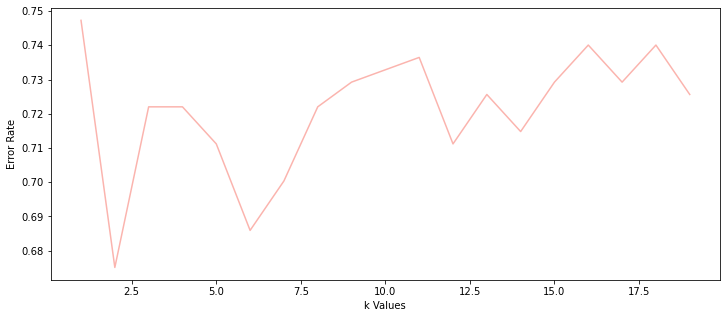

In [34]:
# Plot the graph to see Error Rate vs k values
plt.figure(figsize=(12,5))
plt.plot(range(1,20), errorRate)
plt.xlabel('k Values')
plt.ylabel('Error Rate')

print("Min error:", min(errorRate), "at k =", errorRate.index(min(errorRate)))

In [35]:
# Checking again with the Accuracy rate
accRate=[]
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(training_x, training_y)
    predicting_i = knn.predict(testing_x)
    accRate.append(metrics.accuracy_score(testing_y, predicting_i))

Max accuracy: 0.3249097472924188 at k = 1


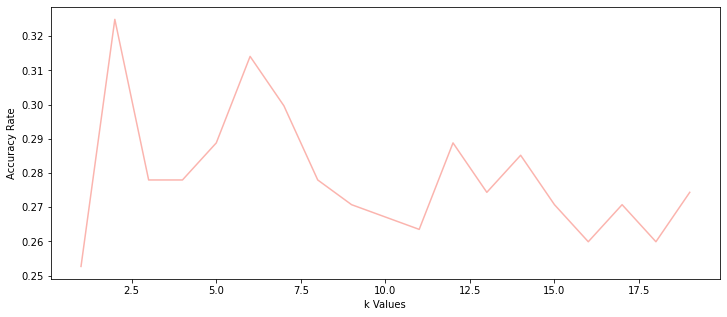

In [36]:
# Plot the graph to see Accuracy Rate vs k values
plt.figure(figsize=(12,5))
plt.plot(range(1,20), accRate)
plt.xlabel('k Values')
plt.ylabel('Accuracy Rate')

print("Max accuracy:", max(accRate), "at k =", accRate.index(max(accRate)))